# Sirve para hacer calculos matematicos mas rapidos.
 * Es una libreria mas cientifica
 * Manipulacion de arreglos, operaciones estadisticas y muchas cosas

In [3]:
import pandas as pd
import numpy as np
import os

# Se hace la lectura del archivo
df = pd.read_csv('fifa_eda.csv')

df.sample(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
17735,244996,R. Campbell,17,England,52,72,Notts County,100.0,2.0,Right,1.0,2.0,ST,2017,2020-01-01,6.083333,172.0,275.0
11081,225557,R. Poole,20,Wales,64,75,Manchester United,675.0,13.0,Right,1.0,2.0,CB,2015,2019-01-01,5.916667,163.0,1400.0
8385,165031,C. Acuña,30,Paraguay,67,67,Albacete BP,725.0,4.0,Right,1.0,2.0,ST,2018,2021-01-01,5.750000,165.0,1200.0


In [4]:
#Transformar la Columna Age a un array de Numpy
age_np = df['Age'].to_numpy()

In [5]:
# Se muestra el tipo de variable para age_np
type(age_np)

numpy.ndarray

In [7]:
# Trae los primeros 10 registros
# Tener en cuenta que cuando se cambio el tipo de datos, se cambia la sinatxis para poder accederlos
age_np[0:10]

array([31, 33, 26, 27, 27, 27, 32, 31, 32, 25])

In [9]:
df['Age'][0:10]

0    31
1    33
2    26
3    27
4    27
5    27
6    32
7    31
8    32
9    25
Name: Age, dtype: int64

In [ ]:
# Cuenta los valores que no son ceros
np.count_nonzero(age_np)
# tambien se puede usar np.shape()

np.int64(18207)

In [11]:
# Obtiene las edades mayores a 30 años
# El resto son ceros (o cualquier otro valor) cuando no es mayor a cero pone 999
np.where(age_np > 30, age_np, 999)

array([ 31,  33, 999, ..., 999, 999, 999], shape=(18207,))

In [12]:
#Indica el jugador mas viejo
ixoldest = np.argmax(age_np)
age_np[ixoldest]

np.int64(45)

# Operaciones estadisticas

In [14]:
# Obtener la media de la edad
# Tomar en cuenta el formateo del numero
# Se puede hacer el ejemplo sin formato
media = age_np.mean()
format_media = "{:.2f}".format(media)
print('la media de los jugadores es: ', format_media,'años')

la media de los jugadores es:  25.12 años


In [17]:
# Obtener los percentiles
for i in range (0, 100, 5):
    print(i, "%: ", np.percentile(age_np, i))

0 %:  16.0
5 %:  18.0
10 %:  19.0
15 %:  20.0
20 %:  21.0
25 %:  21.0
30 %:  22.0
35 %:  23.0
40 %:  23.0
45 %:  24.0
50 %:  25.0
55 %:  25.0
60 %:  26.0
65 %:  27.0
70 %:  28.0
75 %:  28.0
80 %:  29.0
85 %:  30.0
90 %:  32.0
95 %:  33.0


In [19]:
# Para calcular la moda, generamos una rray con los valores unicos de edad
# Y luego vemos el que tiene mas cuentas
vals, counts = np.unique(age_np, return_counts=True)
index = np.argmax(counts) #El indice de la edad mas contada
moda = vals[index]
print(f"La moda de la edad de los jugadores es = {moda:.2f} años")

La moda de la edad de los jugadores es = 21.00 años


In [20]:
counts

array([  42,  289,  732, 1024, 1240, 1423, 1340, 1332, 1358, 1319, 1387,
       1162, 1101,  959,  917,  707,  574,  408,  404,  196,  127,   82,
         37,   25,   13,    5,    1,    2,    1])

In [22]:
# Se caldula me mediana
mediana = np.median(age_np)
print(f"La mediana de la edad de los jugadores es = {mediana:.2f} años")

La mediana de la edad de los jugadores es = 25.00 años


In [23]:
# Desviacion estandar
desvstd = age_np.std()
print(f"La desviacion estandard de la edad de los jugadores es = {desvstd:.2f} años")

La desviacion estandard de la edad de los jugadores es = 4.67 años


# Graficos con numpy

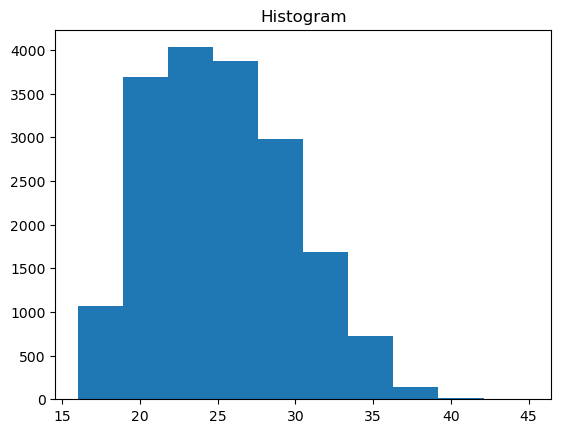

In [24]:
# Se genera un histograma rapido
import matplotlib.pyplot as plt
plt.hist(age_np)
plt.title("Histogram")
plt.show()

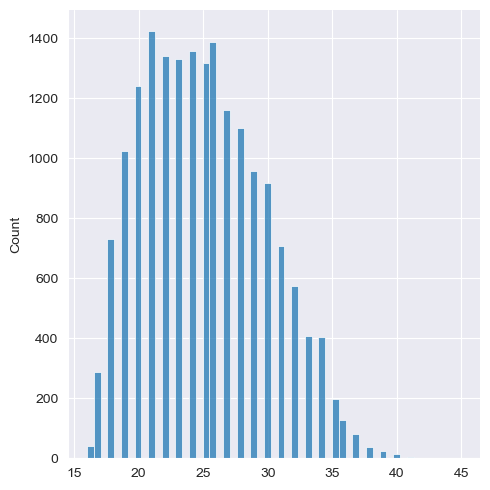

In [25]:
# Se puede mejorar la visualizacion mucho con Seaborn
import seaborn as sns
sns.set_style('darkgrid')
sns.displot(age_np)

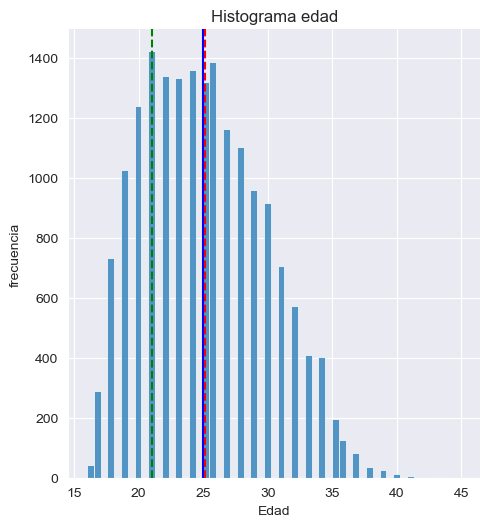

In [26]:
sns.displot(age_np)
plt.xlabel('Edad')
plt.ylabel('frecuencia')
plt.title('Histograma edad')
plt.axvline(x=age_np.mean(), color='red', ls='--')
plt.axvline(x=mediana, color='blue', ls='-')
plt.axvline(x=moda, color='green', ls='--')